# Billing Test Notebook

In [1]:
SYFT_VERSION = ">=0.8.2.b0,<0.9"
package_string = f'"syft{SYFT_VERSION}"'
%pip install {package_string} -f https://whls.blob.core.windows.net/unstable/index.html -q

Note: you may need to restart the kernel to use updated packages.


In [2]:
import syft as sy
sy.requires(SYFT_VERSION)

kj/filesystem-disk-unix.c++:1703: warning: PWD environment variable doesn't match current directory; pwd = /


NameError: name 'PartitionSettings' is not defined

# Setup

Run this with reset=True to setup the API and then go to Data Scientist Notebook

In [ ]:
node = sy.orchestra.launch(name="blue-book", port="auto", dev_mode=True, reset=True)

Starting blue-book server on 0.0.0.0:2212


kj/filesystem-disk-unix.c++:1703: warning: PWD environment variable doesn't match current directory; pwd = /


Waiting for server to start.
.SQLite Store Path:
!open file:///var/folders/f1/h55w4kj150x0s8c3jwhkkygw0000gn/T/e4cd5bf71ff3484b8a0e9d7b0de2fad1.sqlite

.

INFO:     Started server process [59465]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:2212 (Press CTRL+C to quit)


.INFO:     127.0.0.1:51827 - "GET /api/v2/metadata HTTP/1.1" 200 OK
 Done.


In [ ]:
domain_client = node.login(email="info@openmined.org", password="changethis")

SyftWarning: You are using a default password. Please change the password using `[your_client].me.set_password([new_password])`.

INFO:     127.0.0.1:51828 - "GET /api/v2/metadata HTTP/1.1" 200 OK
INFO:     127.0.0.1:51828 - "GET /api/v2/metadata HTTP/1.1" 200 OK
INFO:     127.0.0.1:51828 - "POST /api/v2/login HTTP/1.1" 200 OK
INFO:     127.0.0.1:51828 - "GET /api/v2/types?verify_key=8ca7d1f9b2967b2b2c6155cd51e61ae8617e51e5e2658ab27af27faab51e6be6 HTTP/1.1" 200 OK
INFO:     127.0.0.1:51828 - "GET /api/v2/api?verify_key=8ca7d1f9b2967b2b2c6155cd51e61ae8617e51e5e2658ab27af27faab51e6be6 HTTP/1.1" 200 OK
Logged into <blue-book: High side Domain> as <info@openmined.org>


# Allow User Signup

<DomainClient: blue-book>
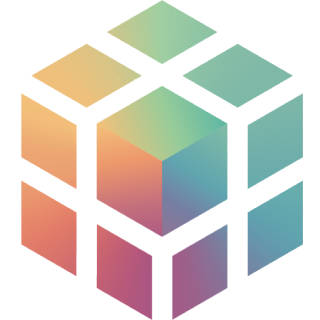

In [ ]:
domain_client

In [ ]:
# Enable guest signups
domain_client.settings.allow_guest_signup(enable=True)

INFO:     127.0.0.1:51831 - "POST /api/v2/api_call HTTP/1.1" 200 OK


SyftSuccess: Registration feature successfully enabled

# Start Mock Third Party FastAPI Web Server

In [ ]:
import gevent
from gevent.subprocess import Popen, PIPE

def run_command(cmd):
    process = Popen(cmd, stdout=PIPE, stderr=PIPE, shell=True)
    for line in process.stdout:
        print(line.strip().decode())

cmd = "cd ../../../packages/grid/openapi/fastapi && uvicorn main:app --reload"
greenlet = gevent.spawn(run_command, cmd)

In [ ]:
# test endpoint is up

In [ ]:
url = "http://127.0.0.1:8000/openapi.json"

In [ ]:
# !curl $url

# Bind to 3rd party OpenAPIv3 API

In [ ]:
result = domain_client.api.services.bridge.add(url=url)
result

INFO:     127.0.0.1:51876 - "POST /api/v2/api_call HTTP/1.1" 200 OK


SyftError: Exception calling bridge.add. Traceback (most recent call last):
  File "/Users/theresa/miniconda3/envs/openmined39/lib/python3.9/site-packages/urllib3/connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "/Users/theresa/miniconda3/envs/openmined39/lib/python3.9/site-packages/urllib3/util/connection.py", line 95, in create_connection
    raise err
  File "/Users/theresa/miniconda3/envs/openmined39/lib/python3.9/site-packages/urllib3/util/connection.py", line 85, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 61] Connection refused

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/theresa/miniconda3/envs/openmined39/lib/python3.9/site-packages/urllib3/connectionpool.py", line 714, in urlopen
    httplib_response = self._make_request(
  File "/Users/theresa/miniconda3/envs/openmined39/lib/python3.9/site-packages/urllib3/connectionpool.py", line 415, in _make_request
    conn.request(method, url, **httplib_request_kw)
  File "/Users/theresa/miniconda3/envs/openmined39/lib/python3.9/site-packages/urllib3/connection.py", line 244, in request
    super(HTTPConnection, self).request(method, url, body=body, headers=headers)
  File "/Users/theresa/miniconda3/envs/openmined39/lib/python3.9/http/client.py", line 1285, in request
    self._send_request(method, url, body, headers, encode_chunked)
  File "/Users/theresa/miniconda3/envs/openmined39/lib/python3.9/http/client.py", line 1331, in _send_request
    self.endheaders(body, encode_chunked=encode_chunked)
  File "/Users/theresa/miniconda3/envs/openmined39/lib/python3.9/http/client.py", line 1280, in endheaders
    self._send_output(message_body, encode_chunked=encode_chunked)
  File "/Users/theresa/miniconda3/envs/openmined39/lib/python3.9/http/client.py", line 1040, in _send_output
    self.send(msg)
  File "/Users/theresa/miniconda3/envs/openmined39/lib/python3.9/http/client.py", line 980, in send
    self.connect()
  File "/Users/theresa/miniconda3/envs/openmined39/lib/python3.9/site-packages/urllib3/connection.py", line 205, in connect
    conn = self._new_conn()
  File "/Users/theresa/miniconda3/envs/openmined39/lib/python3.9/site-packages/urllib3/connection.py", line 186, in _new_conn
    raise NewConnectionError(
urllib3.exceptions.NewConnectionError: <urllib3.connection.HTTPConnection object at 0x7f8d08c0ec10>: Failed to establish a new connection: [Errno 61] Connection refused

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/theresa/miniconda3/envs/openmined39/lib/python3.9/site-packages/requests/adapters.py", line 486, in send
    resp = conn.urlopen(
  File "/Users/theresa/miniconda3/envs/openmined39/lib/python3.9/site-packages/urllib3/connectionpool.py", line 798, in urlopen
    retries = retries.increment(
  File "/Users/theresa/miniconda3/envs/openmined39/lib/python3.9/site-packages/urllib3/util/retry.py", line 592, in increment
    raise MaxRetryError(_pool, url, error or ResponseError(cause))
urllib3.exceptions.MaxRetryError: HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /openapi.json (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f8d08c0ec10>: Failed to establish a new connection: [Errno 61] Connection refused'))

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/theresa/Desktop/source/PySyft/packages/syft/src/syft/node/node.py", line 759, in handle_api_call_with_unsigned_result
    result = method(context, *api_call.args, **api_call.kwargs)
  File "/Users/theresa/Desktop/source/PySyft/packages/syft/src/syft/service/service.py", line 340, in _decorator
    result = func(self, *args, **kwargs)
  File "/Users/theresa/Desktop/source/PySyft/packages/syft/src/syft/service/bridge/bridge_service.py", line 216, in add
    bridge = APIB

Test an endpoint which requires auth and see that it fails.

In [ ]:
# auth required, will fail without login
result = domain_client.api.services.blue_book.get_me()
result

---------------------------------------------------------------------------
SyftAttributeError
---------------------------------------------------------------------------
Exception: 'APIModule' api object has no submodule or method 'blue_book', you may not have permission to access the module you are trying to access


We can add the token to the UserSession.

In [ ]:
result = domain_client.api.services.bridge.authenticate(token="letmein")
result

In [ ]:
result = domain_client.api.services.blue_book.get_me()
result

In [ ]:
result = domain_client.api.services.blue_book.get_all()
result

In [ ]:
result = domain_client.api.services.blue_book.get_model(model_id=7)
result

In [ ]:
model = domain_client.api.types.ResearchModel(name="David")
model

In [ ]:
result = domain_client.api.services.blue_book.set_model(model_id=8, researchmodel=model)
result

In [ ]:
result = domain_client.api.services.blue_book.get_all()
result

In [ ]:
assert len(result) == 2

In [ ]:
domain_client.api.services.blue_book.get_all_compute()

In [ ]:
resource = domain_client.api.services.blue_book.get_compute_config(compute_name="azure_cpu")
resource

In [ ]:
@sy.api_pre_hook(path="blue_book.get_compute_config")
def get_compute_config_pre_hook(context, kwargs):
    print("context.role", context.role)
    print("context.session", context.session)
    print("kwargs", kwargs)
    return kwargs

In [ ]:
get_compute_config_pre_hook.id

In [ ]:
response = domain_client.api.services.bridge.set_wrapper(wrapper=get_compute_config_pre_hook)
response

In [ ]:
@sy.api_post_hook(path="blue_book.get_compute_config")
def get_compute_config_post_hook(context, result):
    context.session["compute"] = result
    return result

In [ ]:
get_compute_config_post_hook.id

In [ ]:
response = domain_client.api.services.bridge.set_wrapper(wrapper=get_compute_config_post_hook)
response

In [ ]:
session = domain_client.api.services.bridge.session()
print(session.kv_store, session.authentication)

In [ ]:
resource = domain_client.api.services.blue_book.get_compute_config(compute_name="azure_cpu")
resource

In [ ]:
session = domain_client.api.services.bridge.session()
print(session.kv_store, session.authentication)

In [ ]:
assert len(session.kv_store) == 1

# Create Endpoints for Managing Cloud VMs

We want to use the skypilot package to manage azure so we need to create a VM image that has skypilot installed.

In [ ]:
skypilot_azure_cli_dockerfile = """
FROM python:3.9-slim

RUN apt-get update && apt-get upgrade -y
RUN apt-get update && \
    apt-get install -y --no-install-recommends \
    curl python3-dev gcc make build-essential cmake git rsync ssh

RUN pip install -U pip skypilot[azure]==0.3.3

# install madhava's branch with changes
RUN pip install 'git+https://github.com/madhavajay/skypilot@madhava/azure#egg=skypilot'

RUN mkdir -p /root/.sky
RUN touch /root/.sky/ssh_config
RUN mkdir -p /root/.ssh
RUN ln -s /root/.sky/ssh_config /root/.ssh/config
RUN echo '#!/bin/bash' >> /start.sh
RUN echo 'echo $PATH' >> /start.sh
RUN echo 'sky --version' >> /start.sh
RUN echo 'sky check' >> /start.sh
"""

The image will need to have a persistent volume for the skypilot directory so that the inventory can be shared between runs.

In [ ]:
volumes = [
    sy.ContainerVolume(
        name="skypilot_data",
        internal_mountpath="/root/.sky",
        mode="rw"
    )
]

In [ ]:
result = domain_client.api.services.container.add_image(
    name="skypilot-azure",
    tag="skypilot-azure:latest",
    dockerfile=skypilot_azure_cli_dockerfile,
    volumes=volumes,
)
result

Now we can tell the system to build the image.

In [ ]:
result = domain_client.api.services.container.build_image(name="skypilot-azure")
assert result

Now we have a few commands we want to support.
First is `sky launch` which takes a few parameters.

`sky launch -n test-llm -c single-t4 -s deployment.yaml`  
`-n for the name`  
`-c for the cluster name`  
`-s to run setup in non interactive mode`  
`arg1 filename.yaml the task you want to run`  
`--detatch-run bool return as soon as job is submitted`  
`--no-setup bool skip setup stage of yaml file`  
`--dryrun bool perform a dry run`  

In [ ]:
cluster = sy.ContainerCommandKwarg(name="c", hyphens="-", equals=" ", value=str, required=True)
yes = sy.ContainerCommandKwargBool(name="yes", value=True, flag=True)
detatch = sy.ContainerCommandKwargBool(name="detach-run", value=True, flag=True)
nosetup = sy.ContainerCommandKwargBool(name="no-setup", value=False, flag=True)
dryrun = sy.ContainerCommandKwargBool(name="dryrun", value=False, flag=True)

Until we add arg and arg order we can cheat and set -s and the file in one kwarg.
The value of the arg is a special type of value called `ContainerUpload` which will ensure that file is uploaded into the container and the path to the file is auto generated in the output argument to match the internal path of the file in the container.

In [ ]:
upload = sy.ContainerUpload(arg_name="s")
file = sy.ContainerCommandKwarg(name="s", hyphens="-", equals=" ", value=upload, required=True)

In [ ]:
kwargs = {
    "c": cluster,
    "s": file,
    "dryrun": dryrun,
    "yes": yes,
    "detatch":detatch,
    "no-setup":nosetup
}

We need to authorize the skypilot container to use Azure. The easiest way during testing is to simply mount the local credentials on your machine. For a better mechanism we would create a service account and add that to a file mount or environment variable.

The following three files are used by the `azure-cli` package:
```
~/.azure/msal_token_cache.json
~/.azure/azureProfile.json
~/.azure/clouds.config
```

In [ ]:
azure_key = sy.ContainerMount(
    internal_filepath="/root/.azure/msal_token_cache.json",
    file=sy.SyftFile.from_path("~/.azure/msal_token_cache.json"),
    mode="rw"
)
azure_key

In [ ]:
azure_profile = sy.ContainerMount(
    internal_filepath="/root/.azure/azureProfile.json",
    file=sy.SyftFile.from_path("~/.azure/azureProfile.json")
)
azure_profile

In [ ]:
azure_clouds_config = sy.ContainerMount(
    internal_filepath="/root/.azure/clouds.config",
    file=sy.SyftFile.from_path("~/.azure/clouds.config")
)
azure_clouds_config

Now we can construct the command by specifying the name it will appear under and the container it will use as well as what kwargs the user can choose to override and which mounts we want to use.

Sky Pilot will generate its own keys, but if we want to share the same key as our main system during testing we can also add some direct mounts to use the same keys.

In [ ]:
sky_private_key = sy.ContainerMount(
    internal_filepath="/root/.ssh/sky-key",
    file=sy.SyftFile.from_path("~/.ssh/sky-key"),
    unix_permission="400",
)
sky_private_key

In [ ]:
sky_public_key = sy.ContainerMount(
    internal_filepath="/root/.ssh/sky-key.pub",
    file=sy.SyftFile.from_path("~/.ssh/sky-key.pub")
)
sky_public_key

## Adding a Launch Endpoint

In [ ]:
command = sy.ContainerCommand(
    module_name="blue_book.azure",
    name="launch",
    image_name="skypilot-azure",
    command="bash",
    args="echo 'abc'",
    kwargs={},
    user_kwargs=[],
    extra_user_kwargs={"compute-type": str, "debug":bool},
    mounts=[azure_key, azure_profile, azure_clouds_config, sky_private_key, sky_public_key]
)
command

In [ ]:
@sy.api_pre_hook(path="blue_book.azure.launch")
def apply_compute_config(context, kwargs):
    import syft as sy
    print("pre hook kwargs", kwargs.keys())
    print("pre hook kwargs", kwargs)
    print("context.role", context.role)
    print("context.session", context.session)
    print("context.session", context.session.keys())
    if "compute" in context.session:
        print(context.session["compute"])
        compute = context.session["compute"]
        cluster_launch_yaml_file = sy.SyftFile.from_string(content=f"""
resources:
  cloud: {compute.cloud}
  instance_type: {compute.instance_type}
  region: {compute.region}
  accelerators: {compute.accelerator}
  disk_size: {compute.disk_size}

num_nodes: 1

workdir: /sandbox

setup: |
  echo "Done"

run: |
  echo "Done"
  
""", filename="cluster_launch.yaml")
        print(cluster_launch_yaml_file.decode())
        kwargs["s"] = cluster_launch_yaml_file
    
    print("kwargs", kwargs)
    del kwargs["compute_type"]
    print("final kwargs", kwargs)
    return kwargs

In [ ]:
response = domain_client.api.services.bridge.set_wrapper(wrapper=apply_compute_config)
response

## Testing the Command

We can simulate how the command will look by passing in some example args to the run command.

Here is an example yaml file we can create from a string.

In [ ]:
cluster_launch_yaml_file = sy.SyftFile.from_string(content="""
resources:
  cloud: azure

num_nodes: 1

workdir: /sandbox

setup: |
  echo "Done"

run: |
  echo "Done"
  
""", filename="cluster_launch.yaml")

In [ ]:
cluster_launch_yaml_file.head()

Here we are choosing to pass `-n test-llm -c single-t4 cluser_launch.yaml --dryrun --no-setup`

In [ ]:
run_user_kwargs = {
    "c": "single-t4",
    "dryrun": True,
    "no-setup": True,
}

extra_user_kwargs = {
    "compute-type": "azure_a100"
}

In [ ]:
command.cmd(run_user_kwargs=run_user_kwargs, run_files={"s": cluster_launch_yaml_file}, run_extra_kwargs=extra_user_kwargs)

That looks about right, notice the path is `/sandbox` this is where the file will be mounted inside the container.

In [ ]:
result = domain_client.api.services.container.add_command(command=command)
result

- Run command
- domain_client.api.services.blue_book.azure.launch(debug?) (check with other notebook)
- Look at `container_service` where `bridge_service = context.node.get_service("BridgeService")` happens, and call this from within the hook we wrote above
- from inside the notebook client.services.billing_service.get_billing_overview, and see a beautiful overview of the costs
- When service is shut down, have a hook that modifies the billing resource to mark it's stopped
  - Also have a method to compute cost 

In [ ]:
# Run command